# Importing Libraries and Loading the dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/1000_Companies.csv')

# EDA

In [ ]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
df.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
995,54135.00,118451.999,173232.6695,California,95279.96251
996,134970.00,130390.080,329204.0228,California,164336.60550
997,100275.47,241926.310,227142.8200,California,413956.48000
998,128456.23,321652.140,281692.3200,California,333962.19000
999,161181.72,270939.860,295442.1700,New York,476485.43000


In [ ]:
df.shape

(1000, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        1000 non-null   float64
 1   Administration   1000 non-null   float64
 2   Marketing Spend  1000 non-null   float64
 3   State            1000 non-null   object 
 4   Profit           1000 non-null   float64
dtypes: float64(4), object(1)
memory usage: 39.2+ KB


In [ ]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,81668.927200,122963.897612,226205.058419,119546.164656
std,46537.567891,12613.927535,91578.393542,42888.633848
min,0.000000,51283.140000,0.000000,14681.400000
25%,43084.500000,116640.684850,150969.584600,85943.198543
50%,79936.000000,122421.612150,224517.887350,117641.466300
75%,124565.500000,129139.118000,308189.808525,155577.107425
max,165349.200000,321652.140000,471784.100000,476485.430000


# **Handling Missing Values**

In [ ]:
df.isnull().sum() #no missing values

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [ ]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

**Replacing Missing values (if any) with the mean of the column (mode in case of categorical data i.e State)**

In [ ]:
df['R&D Spend'].fillna(df['R&D Spend'].mean(), inplace=True)
df['Administration'].fillna(df['Administration'].mean(), inplace=True)
df['Marketing Spend'].fillna(df['Marketing Spend'].mean(), inplace=True)
df['Profit'].fillna(df['Profit'].mean(), inplace=True)
df['State'].fillna(df['State'].mode()[0], inplace=True)

# Converting Categorcial Values to Numerical Ones:

In [ ]:
temp = pd.get_dummies(df['State'], prefix='State') #binary encoding of each state , making diff columns for each of the 3 states
df1 = pd.concat([df, temp], axis=1)
df1.drop('State', axis = 1, inplace = True)

In [ ]:
df1.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,New York,192261.83,False,False,True
1,162597.70,151377.59,443898.53,California,191792.06,True,False,False
2,153441.51,101145.55,407934.54,Florida,191050.39,False,True,False
3,144372.41,118671.85,383199.62,New York,182901.99,False,False,True
4,142107.34,91391.77,366168.42,Florida,166187.94,False,True,False


# Visualization with Matplotlib

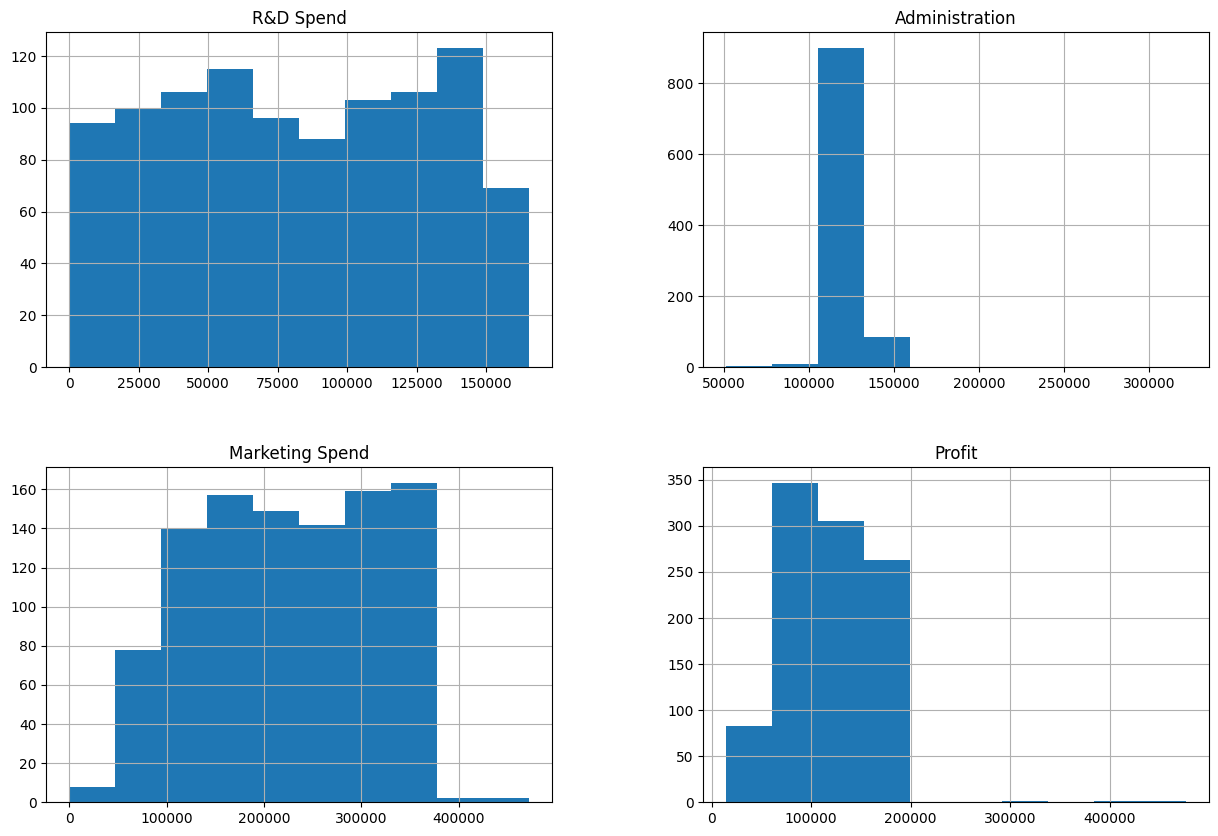

In [ ]:
df.hist(figsize=(15,10))
plt.show()

**Line Plots:**

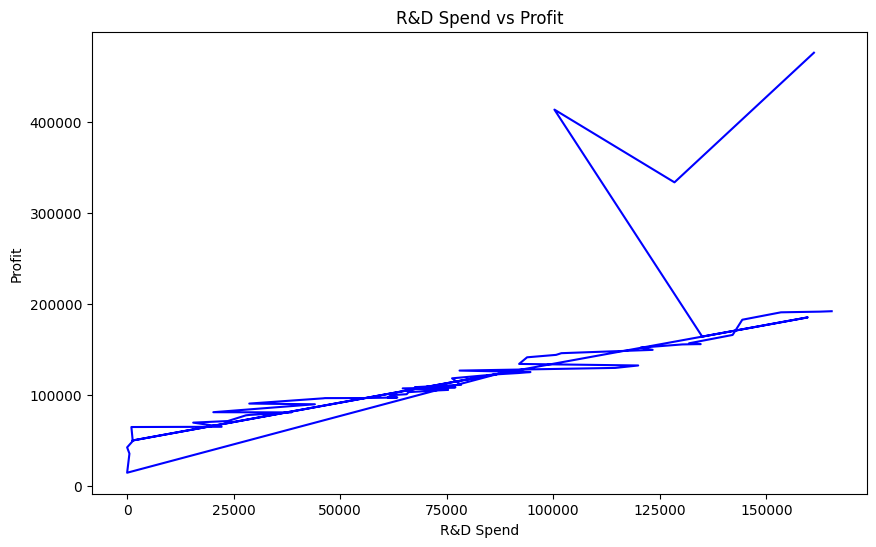

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df['R&D Spend'], df['Profit'], color='blue')
plt.title('R&D Spend vs Profit')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.show()

**Scatter plots:**

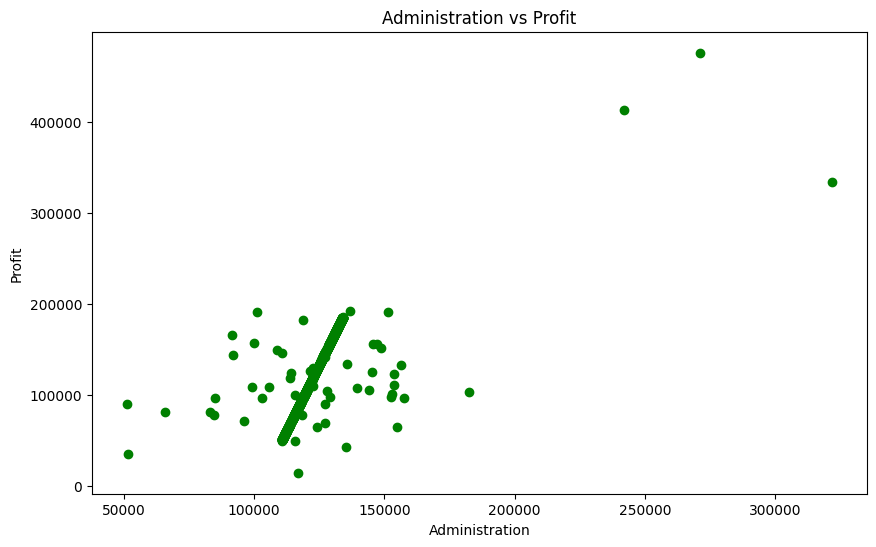

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Administration'], df['Profit'], color='green')
plt.title('Administration vs Profit')
plt.xlabel('Administration')
plt.ylabel('Profit')
plt.show()

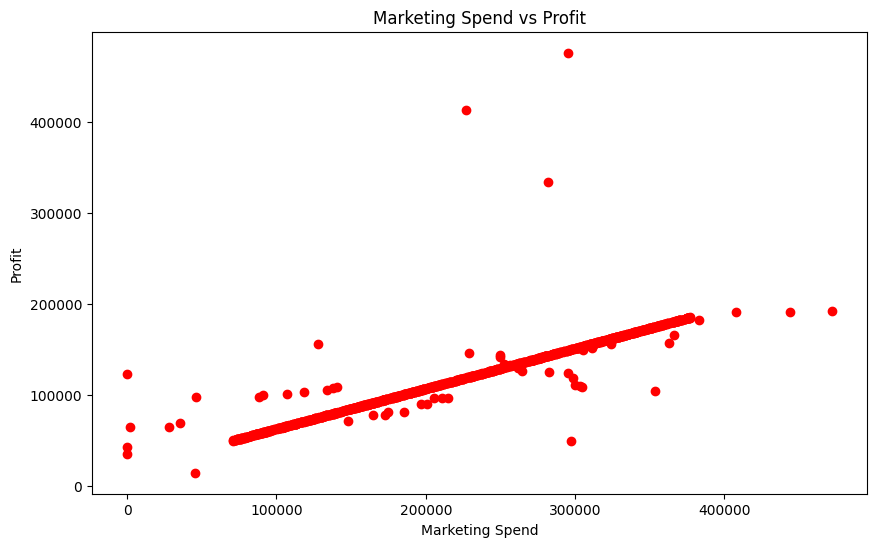

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Marketing Spend'], df['Profit'], color='red')
plt.title('Marketing Spend vs Profit')
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.show()

**Checking Outliers:**

**Using Subplots**

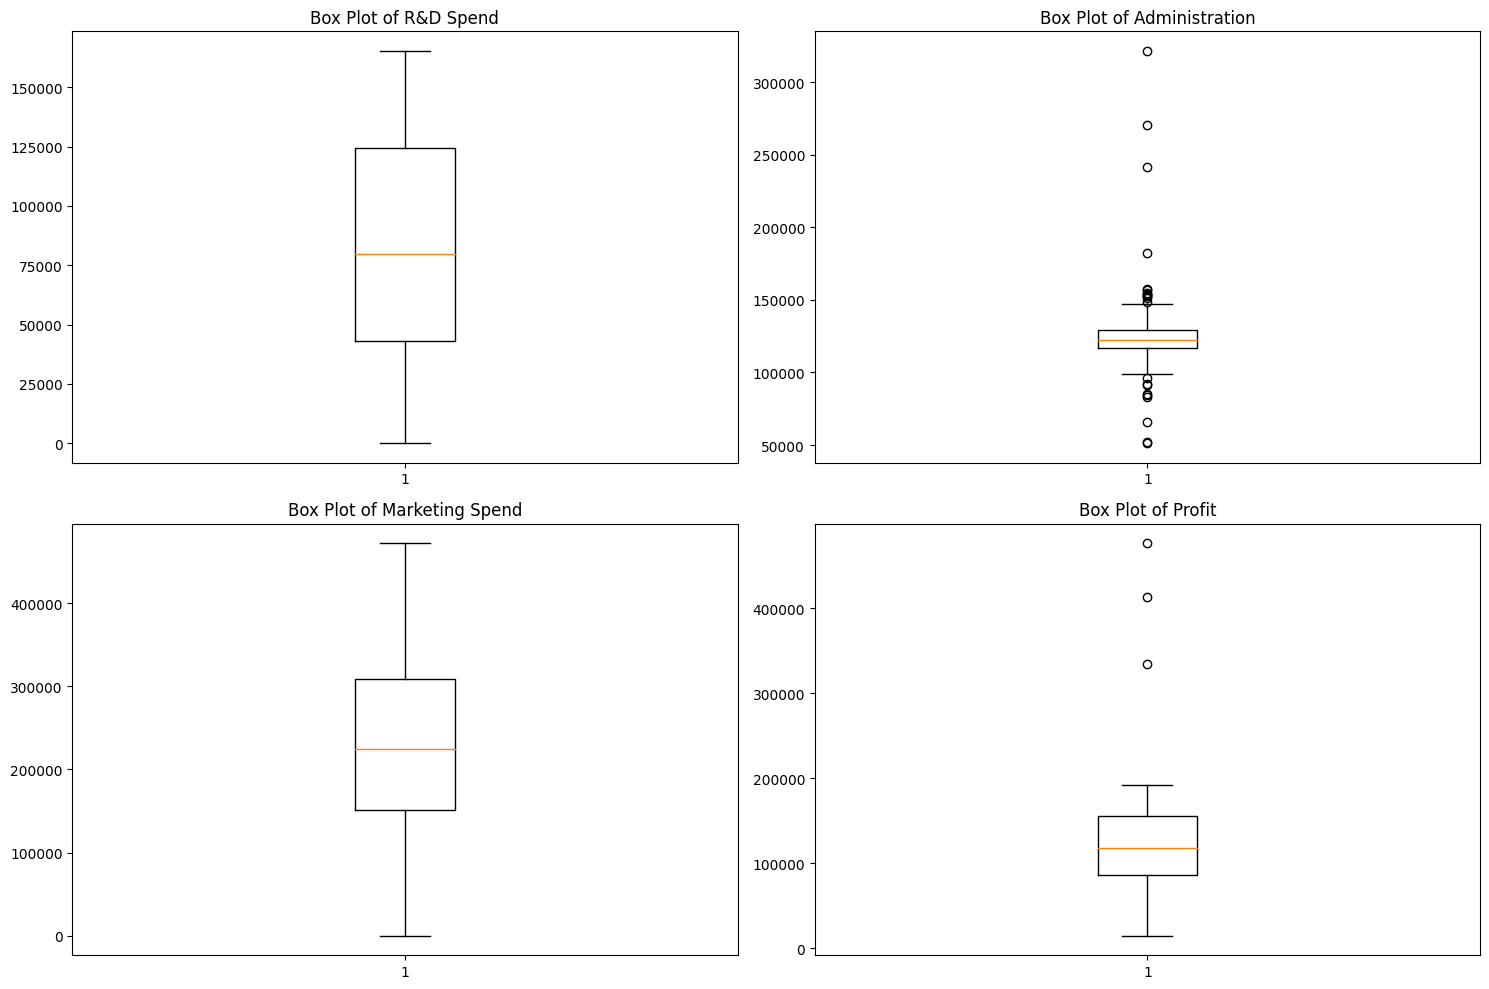

In [ ]:
plt.figure(figsize=(15, 10))
#boxplot to check outliers
plt.subplot(2, 2, 1)
plt.boxplot(x=df['R&D Spend'])
plt.title('Box Plot of R&D Spend')

plt.subplot(2, 2, 2)
plt.boxplot(x=df['Administration'])
plt.title('Box Plot of Administration')

plt.subplot(2, 2, 3)
plt.boxplot(x=df['Marketing Spend'])
plt.title('Box Plot of Marketing Spend')

plt.subplot(2, 2, 4)
plt.boxplot(x=df['Profit'])
plt.title('Box Plot of Profit')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'State vs Average Profit')

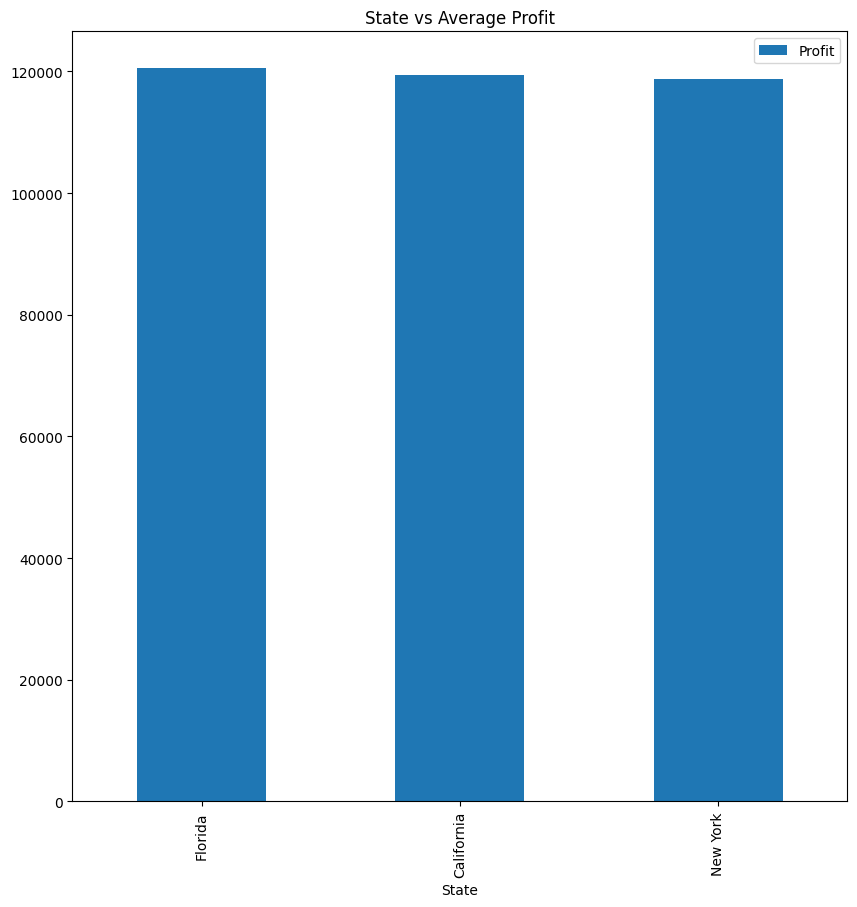

In [ ]:
df = pd.DataFrame(df.groupby(['State'])['Profit'].mean().sort_values(ascending = False)) #check state wise profit
df.plot.bar(figsize=(10,10)); plt.title('State vs Average Profit')

**Histograms:**

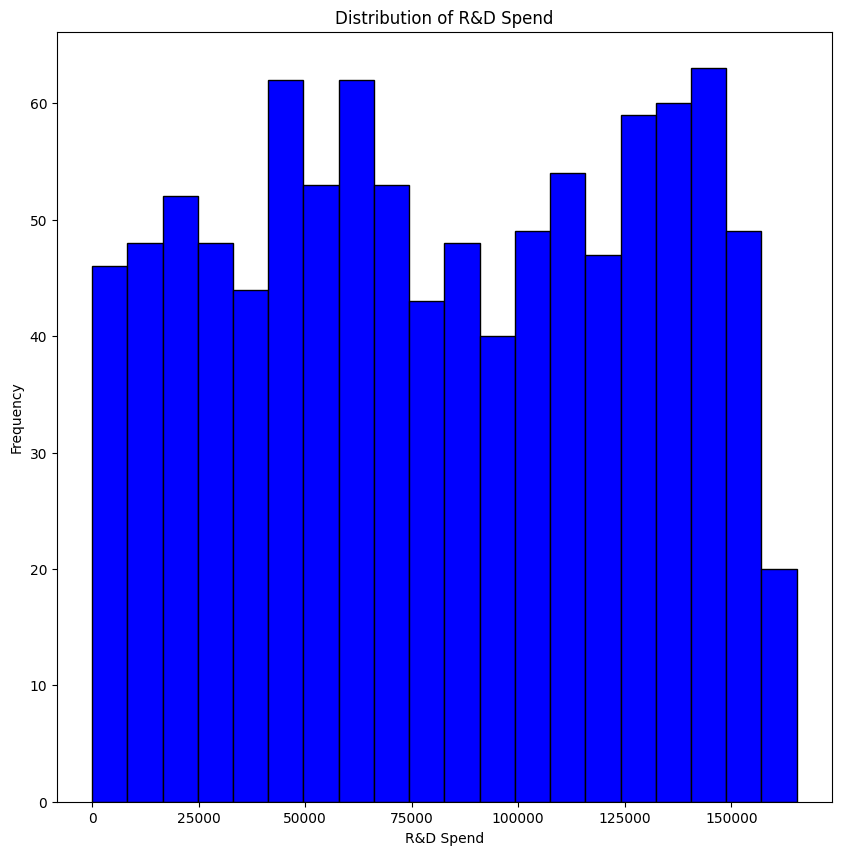

In [ ]:
plt.figure(figsize=(10, 10))
plt.hist(df['R&D Spend'],bins = 20, color='blue', edgecolor='black')
plt.title('Distribution of R&D Spend')
plt.xlabel('R&D Spend')
plt.ylabel('Frequency')
plt.show()

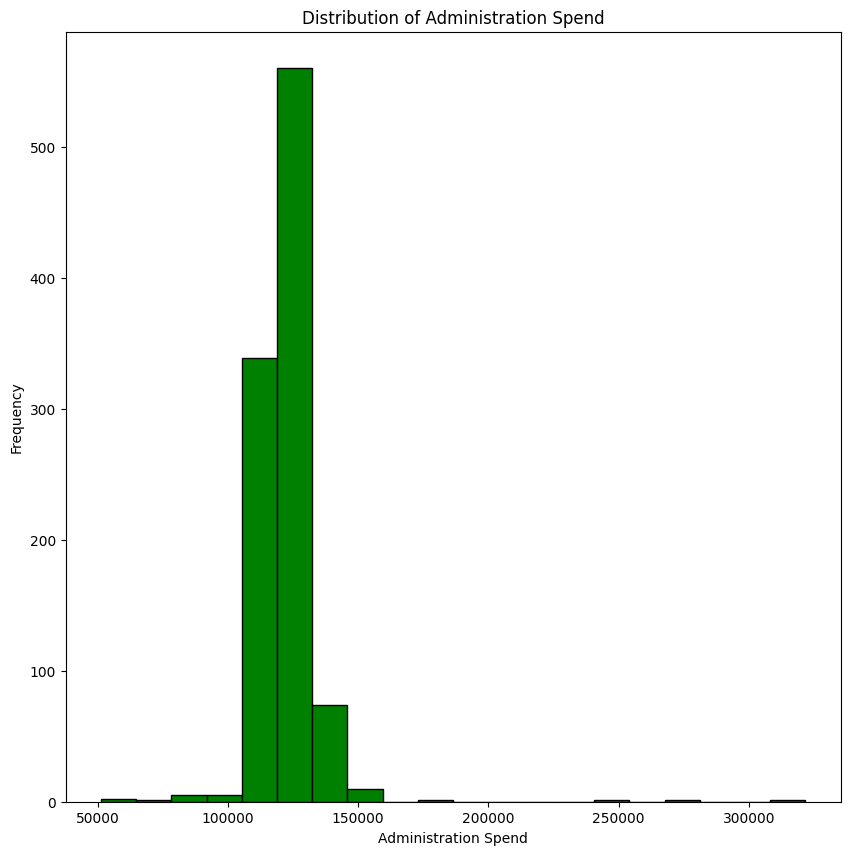

In [ ]:
plt.figure(figsize=(10, 10))
plt.hist(df['Administration'],bins = 20, color='green', edgecolor='black')
plt.title('Distribution of Administration Spend')
plt.xlabel('Administration Spend')
plt.ylabel('Frequency')
plt.show()

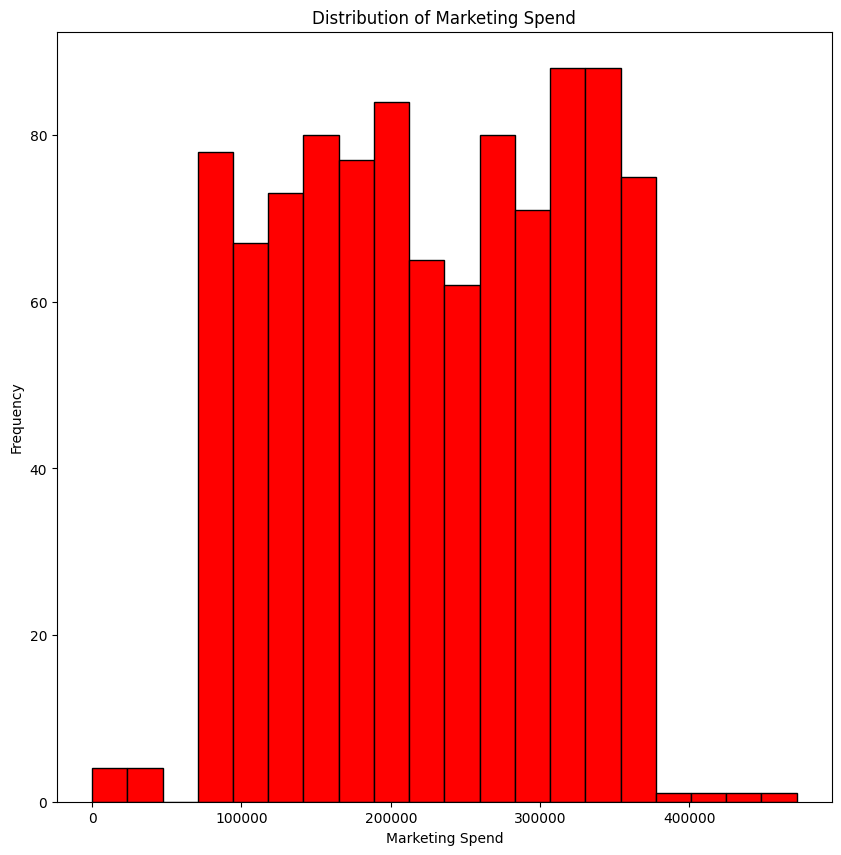

In [ ]:
plt.figure(figsize=(10, 10))
plt.hist(df['Marketing Spend'], bins=20, color='red', edgecolor='black')
plt.title('Distribution of Marketing Spend')
plt.xlabel('Marketing Spend')
plt.ylabel('Frequency')
plt.show()

**PIE Chart:**

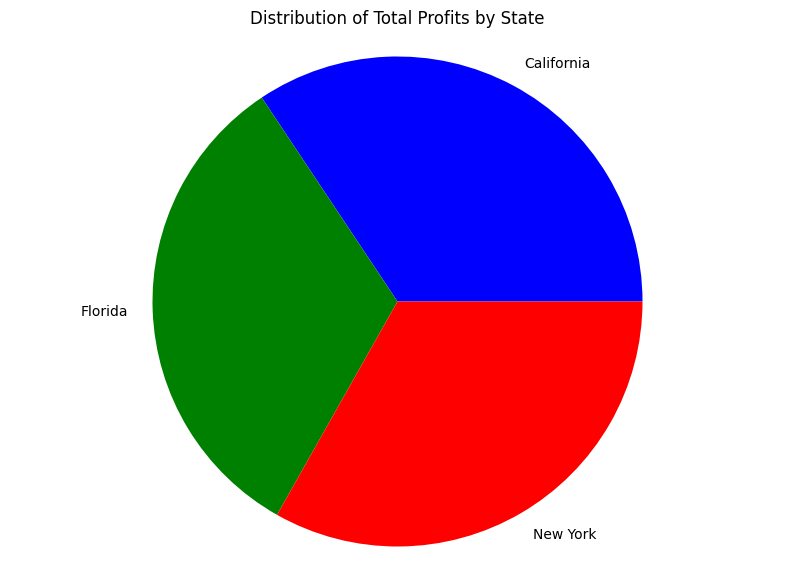

In [ ]:
state_profit = df.groupby('State')['Profit'].sum()

plt.figure(figsize=(10, 7))
plt.pie(state_profit, labels=state_profit.index, colors=['blue', 'green', 'red', 'cyan', 'magenta'])

plt.title('Distribution of Total Profits by State')

plt.axis('equal')
plt.show()